### Gathering data 

In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import pickle

In [2]:
#Loading data
train_data=pd.read_csv('./client_data.csv')
history_data=pd.read_csv('./price_data.csv')
churn_data=pd.read_csv('output.csv')

In [3]:
#Show the first 5 rows of data 
train_data.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [4]:
history_data.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
churn_data.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


In [6]:
#merge the train_data and churn_data into one dataframe
train=pd.merge(train_data,churn_data, on="id")
train.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


### Accessing Data

In [7]:
#See the datatype of train data
train.dtypes

id                           object
activity_new                 object
campaign_disc_ele           float64
channel_sales                object
cons_12m                      int64
cons_gas_12m                  int64
cons_last_month               int64
date_activ                   object
date_end                     object
date_first_activ             object
date_modif_prod              object
date_renewal                 object
forecast_base_bill_ele      float64
forecast_base_bill_year     float64
forecast_bill_12m           float64
forecast_cons               float64
forecast_cons_12m           float64
forecast_cons_year            int64
forecast_discount_energy    float64
forecast_meter_rent_12m     float64
forecast_price_energy_p1    float64
forecast_price_energy_p2    float64
forecast_price_pow_p1       float64
has_gas                      object
imp_cons                    float64
margin_gross_pow_ele        float64
margin_net_pow_ele          float64
nb_prod_act                 

In [8]:
history_data.dtypes

id               object
price_date       object
price_p1_var    float64
price_p2_var    float64
price_p3_var    float64
price_p1_fix    float64
price_p2_fix    float64
price_p3_fix    float64
dtype: object

In [9]:
#See the shape of dataset 
train.shape

(16096, 33)

In [10]:
history_data.shape

(193002, 8)

In [11]:
#See the general descriptive statistics of data
train.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,...,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,...,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,...,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,...,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,...,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,...,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,...,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,...,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


It's seems that the campaign_disc_lel is an empty column

In [12]:
history_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [13]:
#See The missing data of train 
train.isnull().sum()/train.shape[0]

id                          0.000000
activity_new                0.593004
campaign_disc_ele           1.000000
channel_sales               0.262053
cons_12m                    0.000000
cons_gas_12m                0.000000
cons_last_month             0.000000
date_activ                  0.000000
date_end                    0.000124
date_first_activ            0.782058
date_modif_prod             0.009754
date_renewal                0.002485
forecast_base_bill_ele      0.782058
forecast_base_bill_year     0.782058
forecast_bill_12m           0.782058
forecast_cons               0.782058
forecast_cons_12m           0.000000
forecast_cons_year          0.000000
forecast_discount_energy    0.007828
forecast_meter_rent_12m     0.000000
forecast_price_energy_p1    0.007828
forecast_price_energy_p2    0.007828
forecast_price_pow_p1       0.007828
has_gas                     0.000000
imp_cons                    0.000000
margin_gross_pow_ele        0.000808
margin_net_pow_ele          0.000808
n

As we can see that some of columns have missing data over 75%, we need to clean them in the later 

In [14]:
history_data.isnull().sum()/history_data.shape[0]

id              0.000000
price_date      0.000000
price_p1_var    0.007041
price_p2_var    0.007041
price_p3_var    0.007041
price_p1_fix    0.007041
price_p2_fix    0.007041
price_p3_fix    0.007041
dtype: float64

In [15]:
#Deep diving on the main parameters,first for the Churn
churn=train[['id','churn']]
churn.columns=['Companies','churn']

In [16]:
churn_total=churn.groupby(churn['churn']).count()
churn_percentage=churn_total/churn_total.sum()*100


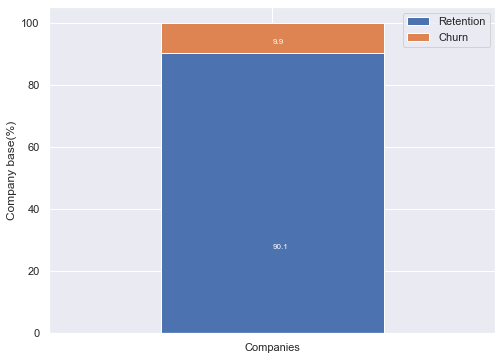

In [17]:
ax=churn_percentage.transpose().plot(kind='bar',stacked=True,figsize=(8,6),rot=0)
for p in ax.patches:
    value=str(round(p.get_height(),1))
    if value=='0':
        countinue
    ax.annotate(value,((p.get_x()+p.get_width()/2)*0.5,p.get_y()+p.get_height()/2*0.6),
               color='white',size=(8))
plt.legend(['Retention','Churn'],loc="upper right")
plt.ylabel("Company base(%)");


About 10% of total customers have chruned

In [18]:
#Next see the acitivity distribution
activity=train[['id','activity_new','churn']]
activity=activity.groupby([activity['activity_new'],activity['churn']])['id'].count().unstack(level=1).sort_values(by=[0],ascending=False)

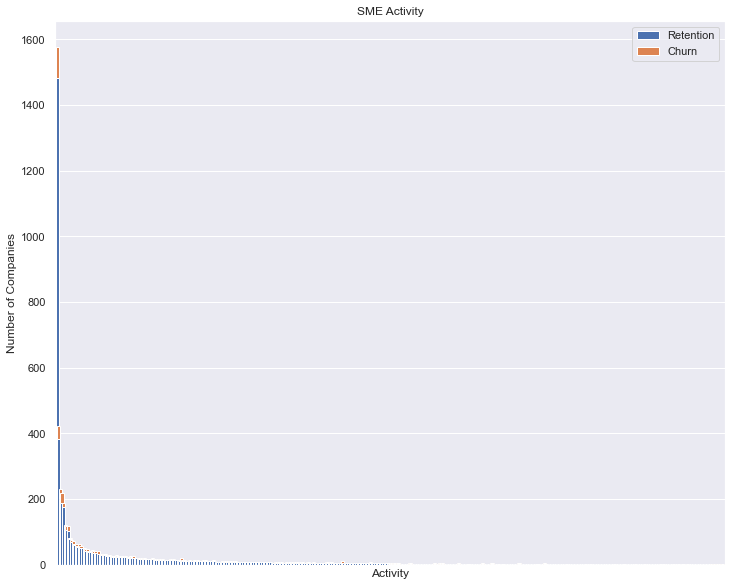

In [22]:
activity.plot(kind='bar',figsize=(12,10),width=2,stacked=True,title="SME Activity")
plt.ylabel("Number of Companies")
plt.xlabel('Activity')
plt.legend(['Retention','Churn'],loc="upper right")
plt.xticks([])
plt.show()

The xticks is not showing to facilitate the visualization and the distribution of the activity is despite the lack of 60% of the entries

In [30]:
activity_total=activity.fillna(0)[0]+activity.fillna(0)[1]
activity_percentage=activity.fillna(0)[1]/(activity_total)*100
pd.DataFrame({'Percentage churn':activity_percentage,
             'Total companies':activity_total}).sort_values(by='Percentage churn',ascending=False).head()

,Percentage churn,Total companies
activity_new,,
xwkaesbkfsacseixxksofpddwfkbobki,100.0,1.0
wkwdccuiboaeaalcaawlwmldiwmpewma,100.0,1.0
ikiucmkuisupefxcxfxxulkpwssppfuo,100.0,1.0
opoiuuwdmxdssidluooopfswlkkkcsxf,100.0,1.0
pfcocskbxlmofswiflsbcefcpufbopuo,100.0,2.0


In [31]:
#Now is about Sales channel
channel=train[['id','channel_sales','churn']]
channel=channel.groupby([channel['channel_sales'],channel['churn']])['id'].count().unstack(level=1).fillna(0)

In [32]:
channel_churn=(channel.div(channel.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)

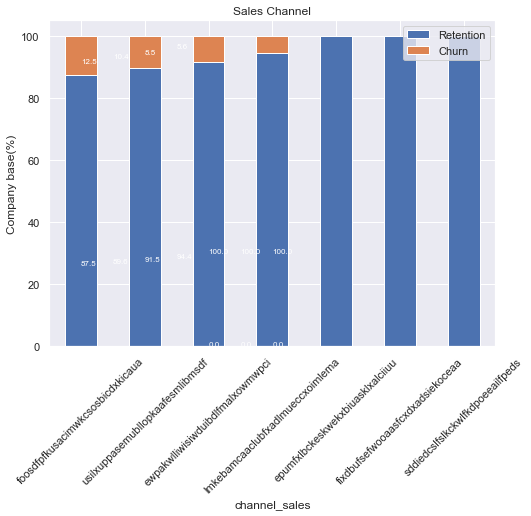

In [39]:
ax=channel_churn.plot(kind='bar',stacked=True,figsize=(8,6),rot=45)
for p in ax.patches:
    value=str(round(p.get_height(),1))
    if value=='0':
        countinue
    ax.annotate(value,((p.get_x()+p.get_width()/2)*0.5,p.get_y()+p.get_height()/2*0.6),
               color='white',size=(8))
plt.title('Sales Channel')
plt.legend(['Retention','Churn'],loc="upper right")
plt.ylabel("Company base(%)");

In [40]:
channel_total=channel.fillna(0)[0]+channel.fillna(0)[1]
channel_percentage=channel.fillna(0)[1]/(channel_total)*100
pd.DataFrame({"Churn percentage":channel_percentage,
             "Total companies":channel_total}).sort_values(by='Churn percentage',ascending=False).head()

,Churn percentage,Total companies
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,12.498306,7377.0
usilxuppasemubllopkaafesmlibmsdf,10.387812,1444.0
ewpakwlliwisiwduibdlfmalxowmwpci,8.488613,966.0
lmkebamcaaclubfxadlmueccxoimlema,5.595755,2073.0
epumfxlbckeskwekxbiuasklxalciiuu,0.000000,4.0


In [41]:
#Next is the consumption
consumption=train[['id','cons_12m','cons_gas_12m','cons_last_month','imp_cons','has_gas','churn']]

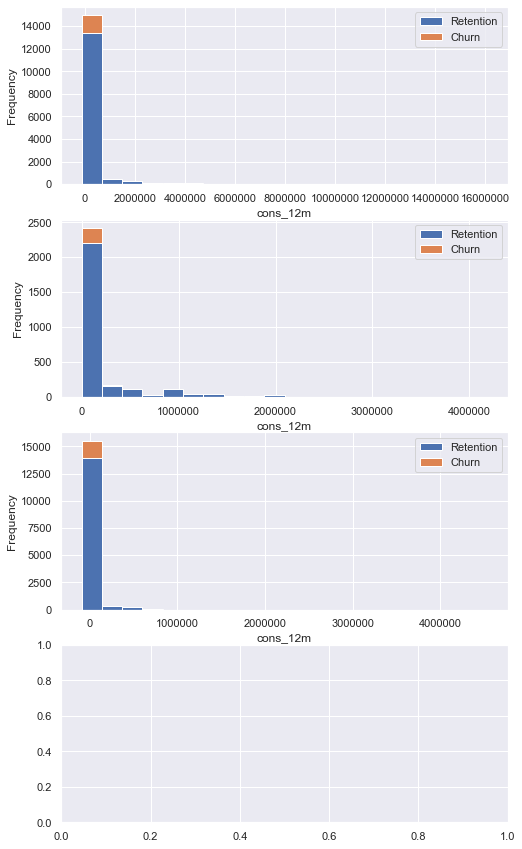

In [62]:
fig,axs=plt.subplots(nrows=4,figsize=(8,15))
cons_12m=pd.DataFrame({'Retention':consumption[consumption['churn']==0]['cons_12m'],
                      'Churn':consumption[consumption['churn']==1]['cons_12m']})
cons_12m[['Retention','Churn']].plot(kind='hist',bins=20,ax=axs[0],stacked=True);
axs[0].set_xlabel('cons_12m')
axs[0].ticklabel_format(style='plain',axis='x')
cons_gas_12m=pd.DataFrame({'Retention':consumption[consumption['has_gas']=='t'][consumption[consumption['has_gas']=="t"]['churn']==0]['cons_gas_12m'],
                      'Churn':consumption[consumption['has_gas']=='t'][consumption[consumption['has_gas']=='t']['churn']==1]['cons_gas_12m']})
cons_gas_12m[['Retention','Churn']].plot(kind='hist',bins=20,ax=axs[1],stacked=True);
axs[1].set_xlabel('cons_12m')
axs[1].ticklabel_format(style='plain',axis='x')
cons_last_month=pd.DataFrame({'Retention':consumption[consumption['churn']==0]['cons_last_month'],
                      'Churn':consumption[consumption['churn']==1]['cons_last_month']})
cons_last_month[['Retention','Churn']].plot(kind='hist',bins=20,ax=axs[2],stacked=True);
axs[2].set_xlabel('cons_12m')
axs[2].ticklabel_format(style='plain',axis='x')
imp_cons=pd.DataFrame({'Retention':consumption[consumption['churn']==0]['imp_cons'],
                      'Churn':consumption[consumption['churn']==1]['imp_cons']})
cons_12m[['Retention','Churn']].plot(kind='hist',bins=20,ax=axs[0],stacked=True);
axs[0].set_xlabel('cons_12m')
axs[0].ticklabel_format(style='plain',axis='x')
